<a href="https://colab.research.google.com/github/LucianPopaLVP/Deep-Learning-Project--Dog-Vision/blob/main/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐶 End-to-end Multi-class Dog Breed Classification

This notebook buils an end-to-end multi-class image classifier using Tensorflow 2.0 and TensorFlow Hub.

## 1. Problem

Identifying the breed of a dog given an image of a dog.

## 2. Data

The data used is from Kaggle's dog bread identification competition: https://www.kaggle.com/c/dog-breed-identification/overview

## 3. Evaluation

Multi-Class Log Loss: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html

## 4. Features

Info about data:
* Dealing with images (unstructured data) so is probably best to use deep learning/transfer learning;
* There are 120 breeds of dogs (this means there are 120 different classes);
* There are ~ 10,000 + images in the training set(these images have labels) and ~ 10,000 images in the test set(no labels);

## Get my space ready

* Import TF 2.X ✅
* Import TF Hub ✅
* Make sure I am using a GPU ✅

In [1]:
# Import necessary tools
# Import TensorFlow and TensorFlow Hub into Colab
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

# Check for GPU availability
print("GPU", "available (YESSS!!!!!!!)" if tf.config.list_physical_devices("GPU") else "not available!")

TF version: 2.7.0
TF Hub version: 0.12.0
GPU available (YESSS!!!!!!!)


## Acces the data and getting it ready ( turning into tensors)

* With all ML lerning models, data has to be in numerical format. 

In [3]:
# Acces the data and checking the labels
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fa72d780b780d1a8fda59852ab62738f  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [4]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


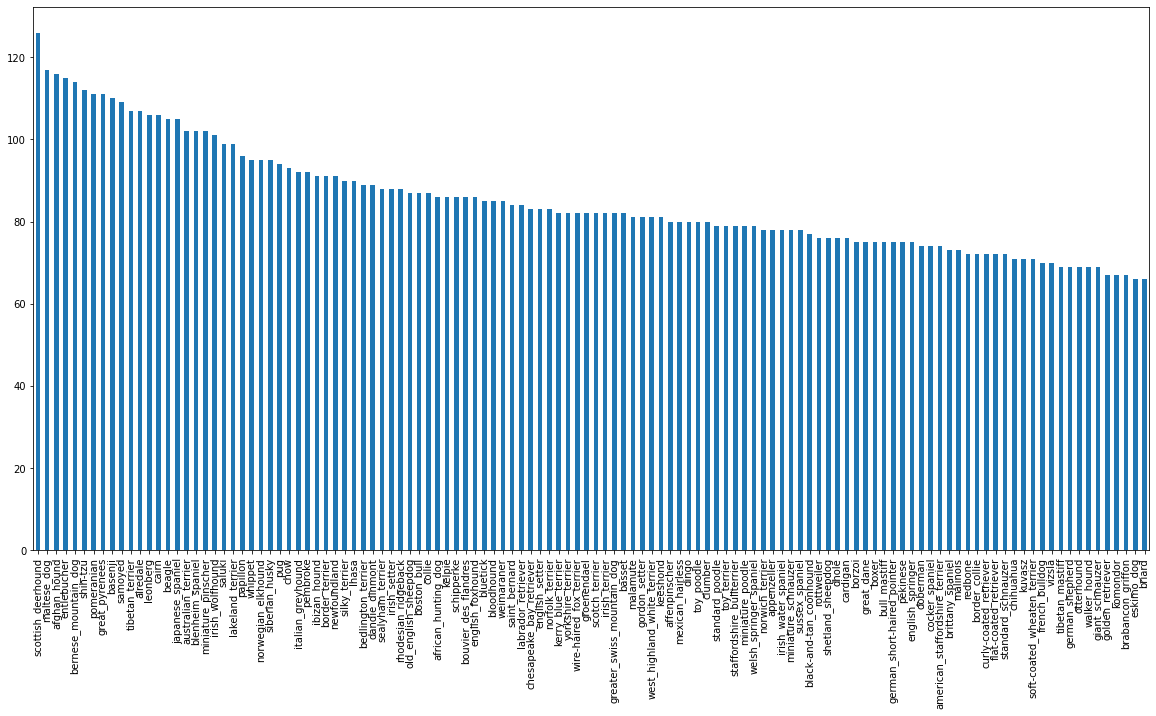

In [6]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))

In [7]:
labels_csv["breed"].value_counts().median()

82.0

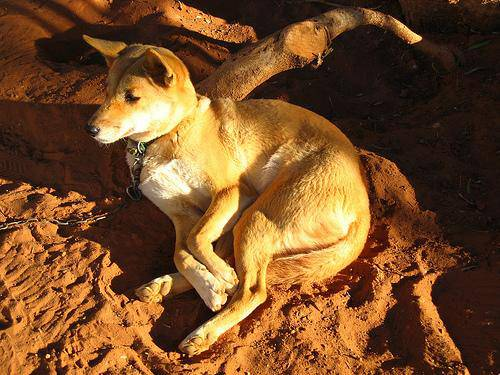

In [8]:
# View an image 
from IPython.display import Image
Image("/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting images and their labels

Get a list of all of the images file pathnames.

In [11]:
# Create pathnames from image ID's
filenames = ["/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/" + fname + "jpg" for fname in labels_csv["id"]]

# Check the first 10
filenames[:10]

['/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303djpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1djpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21bjpg',
 '/content/drive/MyDrive/Colab N

In [12]:
# Check if number of filenames matches the number of actual image files
import os
if len(os.listdir("/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train")) == len(filenames):
  print("They are matching! Proceed!")
else:
  print("They don't match! Check the target directory.")

They are matching! Proceed!
